$𝐻_0$ : осьминог выбирает победителя матча случайно с вероятностью $p = 0.5$

$H_1$ : осьминог выбирает победителя матча случайно с вероятностью $p > 0.5$

В данной задаче логично использовать правый односторонний критерий, так как для нас будем значимым открытие о том, что $p > 0.5$. В этом случае осьминог выбирает победителя с большей вероятностью, нежели случайный выбор, поэтому в таком случае мы, например, будем ставить на победителя согласно прогнозу осьминога. Если же использовать двусторонний критерий и $H_1$ мы принимаем, то может оказаться, что $p < 0.5$, так как это не противоречит $H_1$. В этом случае бесмысленно слушать осьминога, аналогично в случае одностороннего левого критерия.

В качестве статистики возьмем $T(\xi^n) = \sum_{i=1}^n \xi_i$  
Реализация статистики в нашем эксперименте = $T(\xi^n) = 12$ , где $n = 14$.

Рассчитаем p-value, при условии справедливости $H_0, T \sim \text{Binom} (n=14, \mu=0.5)$  

In [12]:
from scipy.stats import binom
import numpy as np
import matplotlib.pyplot as plt
T = 12
N = 14
m = 0.5
p_value = 1 - binom.cdf(k = T, n = N, p = m)
print(f"Вероятность получить T = {T}, или еще более экстремальное значение при условии справедливости H0 = {p_value}")

Вероятность получить T = 12, или еще более экстремальное значение при условии справедливости H0 = 0.00091552734375


Рассчитаем критическое значение для $ a = 0.05 $;

In [18]:
a = 0.05
crit_value = binom.ppf(q = 1-a, n = N, p = m) + 1
print(f'reject H0 if t >= {int(crit_value)}')

reject H0 if t >= 11


Таким образом получаем статистический критерий для $H_0$ и $a = 0.05$, при $T >= 11$ отклоняем $H_0$, в противном случае у нас недостаточно свидетельств для того чтобы отклонить $H_0$

Построим график плотности вероятности для того, чтобы посмотреть вероятности получения различных значений статистики:

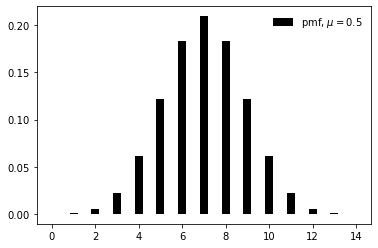

In [16]:
x = np.arange(start=0, stop=N + 1)
fig, ax = plt.subplots(1, 1)
ax.vlines(x, 0, binom.pmf(x, N, m), colors='k', linestyles='-', linewidth=8.0, label='pmf, $\mu = 0.5$')
ax.legend(loc='best', frameon=False)
plt.show()

Такой достигаемый уровень значимости можно обьяснить тем, что при условии справедливости нулевой гипотезы получить значение статистики $T = 12$ практически невозможно, поэтому p-value имеет такое малое значение.